In [7]:

# Data related libraries
import numpy as np
import netCDF4 as nc
import glob
import os


import anha4_utils as au


In [8]:
# Get paths
data_path,mask_path = au.get_paths()
        
# Get complete file list from path
file_list = os.listdir(data_path)


In [123]:

def get_data(filename,row_range,col_range,depth=0, var = 'votemper'):
    """  Getting Data Latitude and Longitude """
    
    # Get data
    data = nc.Dataset(filename)
    temp = data[var][:]

    # Extracting data given lat-lon selection and depth
    temp = temp[0,depth,row_range[0]:row_range[1],col_range[0]:col_range[1]]

    return temp
        
    
def get_row_col_range(data,lat_range,lon_range):

    # Get all lat-lon data
    lat = data['nav_lat_grid_T'][:]
    lon = data['nav_lon_grid_T'][:]

    # Create mask given lat lon values.
    lat_mask = np.ma.filled((lat.data>lat_range[0]) & (lat.data<lat_range[1]) )
    lon_mask = np.ma.filled((lon.data>lon_range[0]) & (lon.data<lon_range[1]) )
    
    # Apply masks to data
    mask = lat
    mask[~(lat_mask & lon_mask )] = 0

    # Find the row,col range by collapsing each axis.
    row_ranges = np.where(mask.data.sum(axis=1) > 0)[0]
    col_ranges = np.where(mask.data.sum(axis=0) > 0)[0]

    # Select range
    row_ranges = (row_ranges[0],row_ranges[-1])
    col_ranges = (col_ranges[0],col_ranges[-1])
    
    return row_ranges,col_ranges
    

In [13]:

filename = file_list[0]
test_data = nc.Dataset(data_path+filename)

lat = test_data['nav_lat_grid_T'][:]
lon = test_data['nav_lon_grid_T'][:]

In [125]:

# An arbitrary choice.
hudson_east = -75
hudson_west = -95
hudson_north = 65
hudson_south = 50


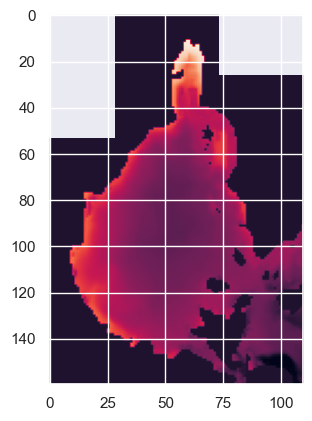

In [126]:

# Get the row col ranges given lat lon ranges.
row_ranges,col_ranges = get_row_col_range(test_data,(hudson_south,hudson_north),(hudson_west,hudson_east))
row_ranges,col_ranges


# Get data 
data_check  = get_data(data_path+file_list[0],row_ranges,col_ranges)


plt.imshow(data_check)




326 486 28 129


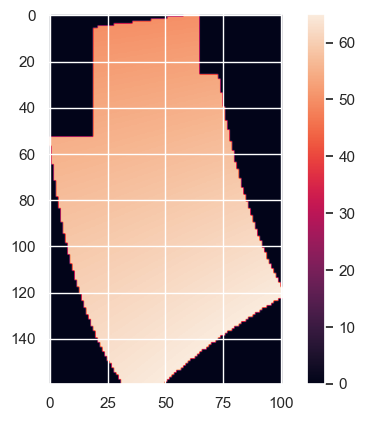

In [114]:
#lat[(lat.data < hudson_north) & (lat.data > hudson_south)]

#lat.data

lat_mask = np.ma.filled((lat.data>hudson_south) & (lat.data<hudson_north) )
lon_mask = np.ma.filled((lon.data>hudson_west) & (lon.data<hudson_east) )




import matplotlib.pyplot as plt


print(row_ranges[0],row_ranges[-1],col_ranges[0],col_ranges[-1])



#lat2.data[300:320,:20] = np.nan
lat2.data[0:col_ranges[0],:20] = np.nan



plt.imshow(lat2.data[300:500,0:200])#[y_ranges[0]:y_ranges[1],x_ranges[0]:x_ranges[1]])
plt.imshow(lat2.data[row_ranges[0]:row_ranges[-1],col_ranges[0]:col_ranges[-1]])
plt.colorbar()




In [106]:
#plt.plot(lat2.sum(axis=0))


#np.where(lat2.data.sum(axis=0) > 0)[0][0]

#lat2.data.shape

x_ranges
#find_nearest_index(lat2[0,:],)


array([326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338,
       339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351,
       352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364,
       365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377,
       378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390,
       391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403,
       404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416,
       417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429,
       430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442,
       443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455,
       456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468,
       469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481,
       482, 483, 484, 485, 486])

In [78]:
lat2[:,0].shape

(800,)

In [77]:
def find_nearest_index(array, value):
    idx = (np.abs(array - value)).argmin()
    return idx


In [70]:
lat[lat != 0 ].max(), lat[lat != 0 ].min()



# Lat Lon boundary on axis 
# max_lat = lat[:,0][lat[:,0] !=0].max()
# min_lat = lat[:,0][lat[:,0] !=0].min()
# max_lon = lon[0,:][lon[0,:] !=0].max()
# min_lon = lon[0,:][lon[0,:] !=0].min()

# #     lon_levels = int(abs( max_lon - min_lon ))
# #     lat_levels = int(abs( max_lat - min_lat ))   


# lat_tick_values = np.arange(int(np.ceil(min_lat)),int(np.ceil(max_lat)),int(max_lat-min_lat)//numer_of_ticks)
# lon_tick_values = np.arange(int(np.ceil(min_lon)),int(np.ceil(max_lon)),int(max_lon-min_lon)//numer_of_ticks)

# # Find indices with no zeros 
# #     lat_valid_index = lat[:,0].nonzero()[0]
# #     lon_valid_index = lon[0,:].nonzero()[0]

# # Calculate the tick values 
# lat_tick_indices = np.array([find_nearest_index(lat[:,0],val) for val in list(lat_tick_values) ])
# lon_tick_indices = np.array([find_nearest_index(lon[0,:],val) for val in list(lon_tick_values) ])


(64.999855, 50.000126)

In [67]:
lat[:,0].shape

(800,)